<a href="https://colab.research.google.com/github/yongjulee0213/ale_python_interface/blob/master/categorical_rps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#down load the data
# Download the train set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
    
# Download the test set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip

--2022-09-30 06:34:57--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.111.128, 142.250.65.80, 142.251.16.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip.1’

rps.zip.1           100%[===================>] 191.38M   147MB/s    in 1.3s    

2022-09-30 06:34:59 (147 MB/s) - ‘rps.zip.1’ saved [200682221/200682221]

--2022-09-30 06:34:59--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.111.128, 142.250.65.80, 142.251.16.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-te

In [3]:
#uzip data + make directory
import zipfile

#training
local_zip='/content/rps.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content/rps-train')
zip_ref.close()

#test
local_zip='/content/rps-test-set.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content/rps-test')
zip_ref.close()

In [4]:
#디렉토리 할당 + 데이터 크기 출력 + 레이블 이름 할당
import os

#디렉토리 할당
base_dir='/content/rps-train/rps'

rock_dir=os.path.join(base_dir,'rock')
paper_dir=os.path.join(base_dir,'paper')
scissors_dir=os.path.join(base_dir,'scissors')

#데이터 크기 출력
print('total training rock images: ',len(os.listdir(rock_dir)))
print('total training paper images: ',len(os.listdir(paper_dir)))
print('total training scissors images: ',len(os.listdir(scissors_dir)))

#레이블 이름 할당
rock_files=os.listdir(rock_dir)
print(rock_files[:10])

paper_files=os.listdir(paper_dir)
print(paper_files[:10])

scissors_files=os.listdir(scissors_dir)
print(scissors_files[:10])


total training rock images:  840
total training paper images:  840
total training scissors images:  840
['rock01-023.png', 'rock04-008.png', 'rock01-010.png', 'rock05ck01-040.png', 'rock07-k03-090.png', 'rock06ck02-009.png', 'rock05ck01-014.png', 'rock05ck01-081.png', 'rock06ck02-010.png', 'rock03-056.png']
['paper02-107.png', 'paper01-049.png', 'paper07-065.png', 'paper07-119.png', 'paper03-112.png', 'paper07-067.png', 'paper02-001.png', 'paper03-062.png', 'paper03-080.png', 'paper07-085.png']
['scissors03-061.png', 'scissors03-088.png', 'testscissors02-012.png', 'testscissors03-094.png', 'testscissors02-048.png', 'scissors02-051.png', 'testscissors03-115.png', 'testscissors01-085.png', 'testscissors02-060.png', 'scissors04-002.png']


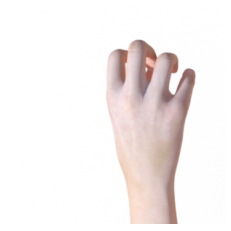

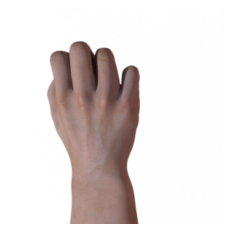

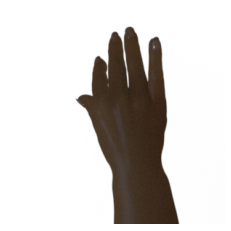

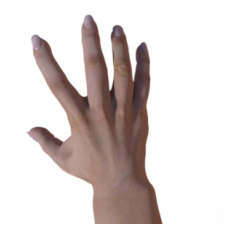

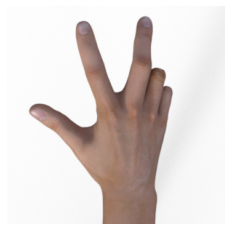

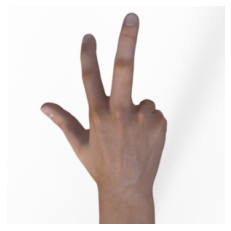

In [5]:
#데이터 몇개 출력하기
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index=2

next_rock=[os.path.join(rock_dir, fname)
            for fname in rock_files[pic_index-2:pic_index]]
next_paper=[os.path.join(paper_dir,fname)
            for fname in paper_files[pic_index-2:pic_index]]
next_scissors=[os.path.join(scissors_dir, fname)
              for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  img=mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

In [6]:
#build the model
import tensorflow as tf
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [7]:
#make generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR='/content/rps-train/rps'
training_datagen=ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

VALIDATION_DIR='/content/rps-test/rps-test-set'
validation_datagen=ImageDataGenerator(rescale=1/255)

train_generator=training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=126
)

validation_generator=validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=126
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [8]:
#compile
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['acc'])

In [ ]:
#training
history=model.fit(train_generator,epochs=25,steps_per_epoch=20,validation_data=validation_generator,verbose=1,validation_steps=3)

Epoch 1/25
20/20 [==============================] - 207s 10s/step - loss: 1.2832 - acc: 0.3373 - val_loss: 1.0907 - val_acc: 0.3978
Epoch 2/25
20/20 [==============================] - 173s 9s/step - loss: 1.1066 - acc: 0.3988 - val_loss: 1.0944 - val_acc: 0.3333
Epoch 3/25
20/20 [==============================] - 169s 8s/step - loss: 1.1315 - acc: 0.4234 - val_loss: 1.0688 - val_acc: 0.4409
Epoch 4/25
20/20 [==============================] - 164s 8s/step - loss: 1.1023 - acc: 0.5377 - val_loss: 0.6088 - val_acc: 0.8118
Epoch 5/25
20/20 [==============================] - 171s 9s/step - loss: 0.9005 - acc: 0.5714 - val_loss: 0.7175 - val_acc: 0.6667
Epoch 6/25
20/20 [==============================] - 168s 8s/step - loss: 0.8883 - acc: 0.6214 - val_loss: 0.7062 - val_acc: 0.8495
Epoch 7/25
20/20 [==============================] - 168s 8s/step - loss: 0.7277 - acc: 0.6992 - val_loss: 0.6568 - val_acc: 0.6532
Epoch 8/25
11/20 [===============>..............] - ETA: 1:11 - loss: 0.5888 - acc

In [ ]:
#학습 과정 로스 및 정확도 출력
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,'r',label='training acc')
plt.plot(epochs,val_acc,'b',label='validation acc')
plt.title('training and validation acc')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
#test
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path=fn
  img=image.load_img(path,target_size=(150,150))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)

  images=np.vstack([x])
  classes=model.predict(images, batch_size=10)
  print(fn)
  print(classes)
